In [2]:
import os 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
filename = os.path.join(os.getcwd(), "data", "description_extracted.csv")
df = pd.read_csv(filename, header=0, encoding='utf-8')
df.dropna(inplace=True)
df.head()

,RequisitionID,ExtractedDescription
0,00000224907,**The Boeing Company** is in search of a **L...
1,00000331804,Find your future with us.\n\nJob Description\n...
2,00000336462,Find your future with us.\n\nWe are Boeing Res...
3,00000338951,In this role you will have an opportunity to w...
4,00000339390,The stress analyst must also be able to effect...


In [4]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

RequisitionID           0
ExtractedDescription    0
dtype: int64

In [14]:
# Convert job descriptions into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=500, min_df=8)  # Adjust max_features as needed
job_description_vectors = vectorizer.fit_transform(df['ExtractedDescription'])

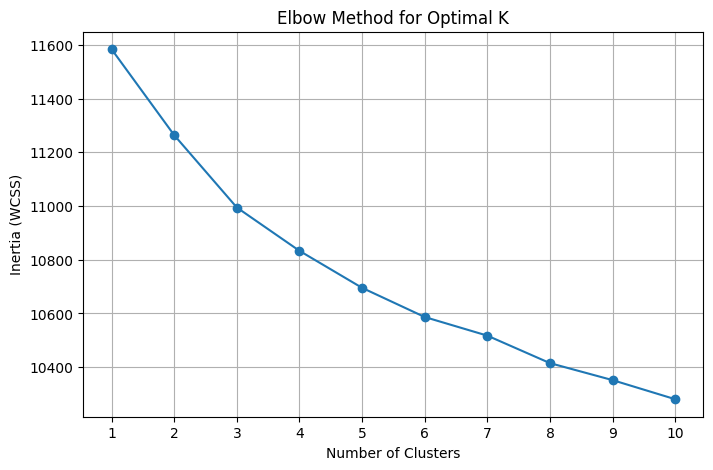

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Calculate inertia for a range of cluster numbers
inertias = []
k_values = range(1, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(job_description_vectors)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [16]:
num_clusters = 5  # Adjust this to suit your data better
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(job_description_vectors)

# Add the cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

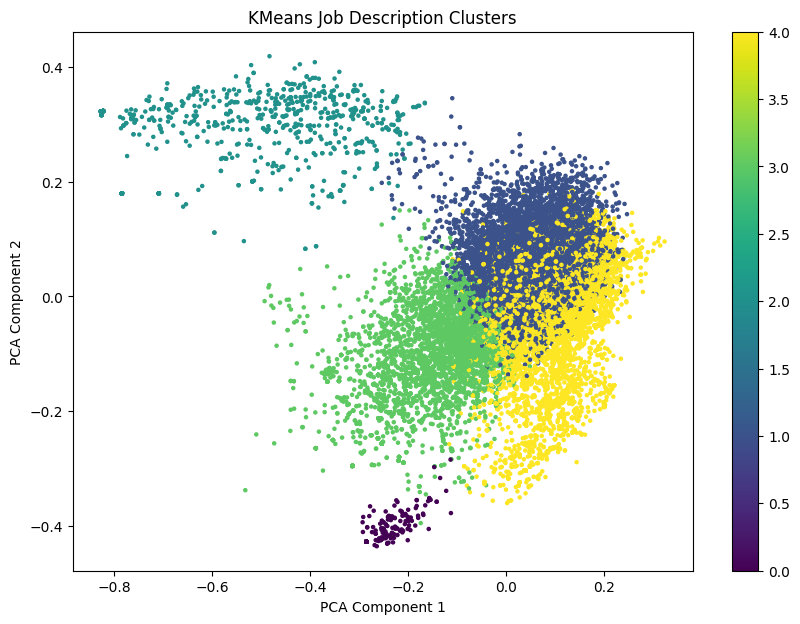

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(job_description_vectors)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=df['Cluster'], cmap='viridis', s=5)
plt.colorbar()
plt.title("KMeans Job Description Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()